In [2]:
import numpy as np
from scipy.optimize import curve_fit
from pathlib import Path

import matplotlib.pyplot as plt

import os
import glob
from pathlib import Path

import pandas as pd

In [3]:
working_dir_data = r"C:\\Users\\LauraMartins\Documents\\PhD\\Lab\\Code\Analysis_code_git\\Tomography\Data\\QST_Final"
os.chdir(working_dir_data)

filenames = [i for i in glob.glob("QST*")]

In [4]:
rate = [151.9, 67.0, 45.3, 28.6, 16.0, 7, 1.7]
rate_error = [3.2, 1.5, 1.1, 0.8, 0.4, 0.2, 0.1]

fidelity_no_correction = [0.89758, 0.92106, 0.92694, 0.93098, 0.94125, 0.94151, 0.94729]
fidelity_error_no_correction = [0.001869, 0.001585, 0.001622, 0.001871, 0.001594, 0.002111, 0.002077]

fidelity_2e_correction = [0.92148, 0.93506, 0.93954, 0.93959, 0.94867, 0.94647, 0.94985]
fidelity_error_2e_correction = [0.001713, 0.001639, 0.001656, 0.001769, 0.001612, 0.00212, 0.001935]

In [35]:
def f(x, a, b, c):
    return a*x**2+b*x+c

C:\Users\LauraMartins\AppData\Local\Temp\ipykernel_16812\2504588779.py:8: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.errorbar(rate, fidelity_no_correction, xerr=rate_error, yerr=fidelity_error_no_correction, fmt="o", label="Data (No Correction)", color="darkviolet", marker='o', mfc='w')
C:\Users\LauraMartins\AppData\Local\Temp\ipykernel_16812\2504588779.py:13: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.errorbar(rate, fidelity_2e_correction, xerr=rate_error, yerr=fidelity_error_2e_correction, fmt="o", label="Data Corrected with Double Emissions", color="navy", marker='s', mfc='w')


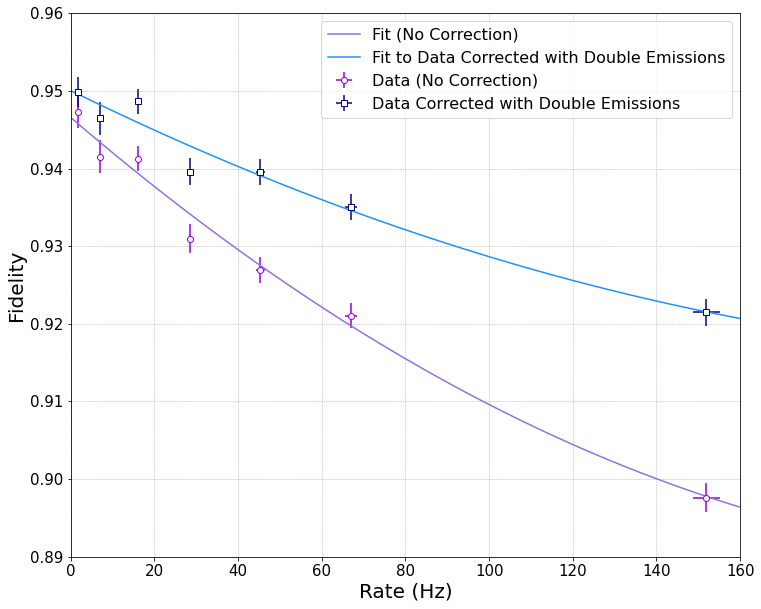

In [113]:
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'

x_fit = np.linspace(0, 160, 1000)
plt.figure(figsize=(12,10))

plt.errorbar(rate, fidelity_no_correction, xerr=rate_error, yerr=fidelity_error_no_correction, fmt="o", label="Data (No Correction)", color="darkviolet", marker='o', mfc='w')
popt, pcov = curve_fit(f, rate, fidelity_no_correction, p0=([1e-6,200,1]), sigma=fidelity_error_no_correction)
y_fit = f(x_fit, *popt)
plt.plot(x_fit, y_fit, label="Fit (No Correction)", color="mediumpurple")

plt.errorbar(rate, fidelity_2e_correction, xerr=rate_error, yerr=fidelity_error_2e_correction, fmt="o", label="Data Corrected with Double Emissions", color="navy", marker='s', mfc='w')
popt_2, pcov_2 = curve_fit(f, rate, fidelity_2e_correction, p0=([1e-6,200,1]), sigma=fidelity_error_2e_correction)
y_fit_2 = f(x_fit, *popt_2)
plt.plot(x_fit, y_fit_2, label="Fit to Data Corrected with Double Emissions", color="dodgerblue")

plt.xlabel("Rate (Hz)", fontsize=20)
plt.ylabel("Fidelity", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim(0,160)
plt.ylim(0.89,0.96)
plt.grid(linestyle = '--', linewidth = 0.5)
plt.legend(fontsize=16)
plt.savefig(r"C:\Users\LauraMartins\Documents\PhD\Lab\Presentations&Reports&Figure\Figures_GHZ\\Fidelity_vs_Rate.svg")
plt.show()